Author: Jakidxav
    
This Jupyter Notebook is meant to be an introductory tutorial on how you can plot atmospheric and oceanic data using [Cartopy](https://scitools.org.uk/cartopy/docs/v0.15/index.html). Here, I am plotting sea surface temperature (SST) and then SST anomalies from NOAA's [OI SST V2 High Resolution Dataset](https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html).

In [1]:
import os
import netCDF4 as nc
import numpy as np

from cartopy import config
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

In [2]:
sst_name = "/Users/jakidxav/Desktop/Testing/sst.day.mean.2010.nc"

#load in data, extract variables of interest
data = nc.Dataset(sst_name)
sst = data.variables['sst'][:]
longitude  = data.variables['lon'][:]
latitude  = data.variables['lat'][:]

In [6]:
anom_name = "/Users/jakidxav/Desktop/Testing/sst.day.anom.2010.nc"

#now load in anomaly data
f = nc.Dataset(anom_name)
anom = f.variables['anom'][:]
lons  = f.variables['lon'][:]
lats  = f.variables['lat'][:]

## SST MAP

Before we plot, we need to choose our projection. A projection is simply a way to change latitude and longitude coordinates in 3-D space into something that is 2-D. There are many different types implemented in Cartopy (see the full list [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)), but for our purposes a Plate Carree projection works fine.

Note, that we are using a global map for this tutorial. You can also subset for latitude and longitude if we want to focus in on a specific region.

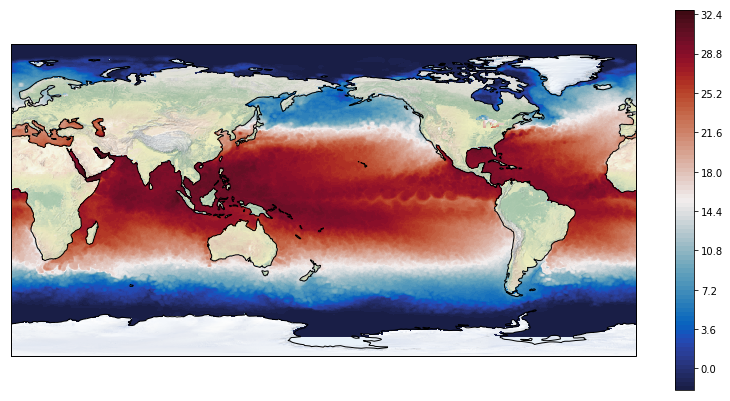

In [9]:
fig = plt.figure(figsize=(14, 28))

#plot the pacific ocean in the center of the map
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.set_global()

#contour data
plt.contourf(longitude, latitude, sst[175], 100, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance)
plt.colorbar(shrink=0.25)

#set coastlines and stock image of continents
ax.stock_img()
ax.coastlines()

plt.show()

## Anomaly Map

Now for the anomaly map, or how SST deviates spatially from the mean.

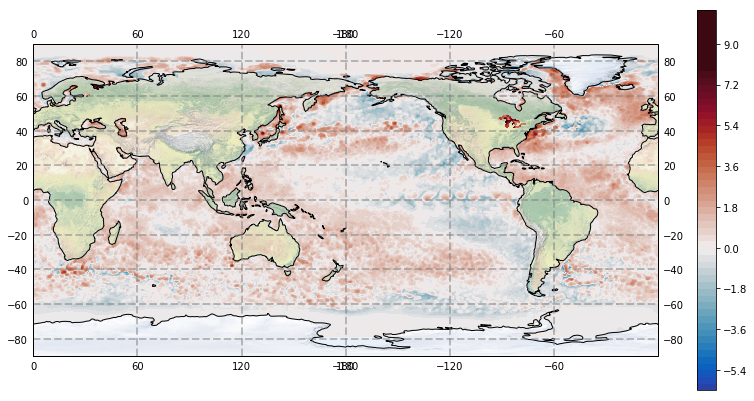

In [10]:
fig2 = plt.figure(figsize=(14, 28))

#now let's plot the anomaly data
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax2.set_global()

#normalize the colormap so that the zero contour is white
Norm = mpl.colors.Normalize(vmin=-8.,vmax=8.)
plt.contourf(lons, lats, anom[175], 60, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, norm=Norm)

#draw continents and their borders
ax2.stock_img()
ax2.coastlines()

#we can also set gridlines on map
ax2.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
plt.colorbar(shrink=0.25, norm=Norm)

plt.show()